<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lista_maca_peso = [168, 201, 184, 216, 177, 230, 149, 192, 206, 219, 177, 194, 241, 162, 207]
lista_maca_diam = [7.7, 9.2, 8.5, 9.8, 8.1, 10.1, 6.9, 8.8, 9.4, 10.0, 8.2, 9.0, 10.6, 7.5, 9.6]
maca = ['maca' for i in range(15)]

lista_laranja_peso = [150, 162, 170, 182, 195, 204, 213, 221, 234, 246, 257, 266, 278, 287, 296]
lista_laranja_diam = [6, 6.5, 6.8, 7.1, 7.4, 7.7, 8, 8.3, 8.6, 8.9, 9.2, 9.5, 9.8, 10.1, 10.4]
laranja = ['laranja' for i in range(15)]

peso = lista_maca_peso + lista_laranja_peso
diam = lista_maca_diam + lista_laranja_diam
frutas = maca + laranja

df = pd.DataFrame(columns=['peso', 'diametro', 'fruta'])
df['peso'] = peso
df['diametro'] = diam
df['fruta'] = frutas

df['fruta'] = df.apply(lambda x : 0 if x['fruta'] == 'maca' else 1, axis=1)

In [358]:
class Perceptron():
    def __init__(self, n_inputs : int, seed : int):
        np.random.seed(seed)
        self.weights = np.random.randn(n_inputs + 1)

    def to_numpy(self, X_train, X_test, y_train, y_test):
        X_train = X_train.to_numpy()
        X_test = X_test.to_numpy()
        y_train = y_train.to_numpy()
        y_test = y_test.to_numpy()

        return X_train, X_test, y_train, y_test  

    def fit(self, X, y):
        loss_epoch = 0

        bias_column = np.ones((X.shape[0], 1))
        X = np.concatenate((bias_column, X), axis=1)

        y = np.array(y)

        for iterations in range(10000):
            for i , line in enumerate(X):
                y_ = np.dot(line, self.weights)
                y_ = 0 if y_ <= 0 else 1
                
                err = y[i][0] - y_

                if err != 0:
                    self.weights +=  err * line

    def predict(self, X):
        y_pred = list()

        bias_column = np.ones((X.shape[0], 1))       
        X = np.concatenate((bias_column, X), axis=1)

        for i, line in enumerate(X):
            y_ = np.dot(line, self.weights)
            y_ = 0 if y_ <= 0 else 1
            y_pred .append(y_)

        y_pred = np.array(y_pred)
        return y_pred.reshape(y_pred.shape[0], 1)

    def score(self, y, y_pred):
        return np.sum(y == y_pred) / y.shape[0]

In [359]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fruta']), df['fruta'], stratify=df['fruta'], test_size=0.33, random_state=1, shuffle=True)

perceptron = Perceptron(X_train.shape[1], 1)

X_train, X_test, y_train, y_test = perceptron.to_numpy(X_train, X_test, y_train, y_test)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

perceptron.fit(X_train, y_train)

y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

print(f'Precisão na base de treino: {perceptron.score(y_pred_train, y_train)}')
print(f'Precisão na base de teste: {perceptron.score(y_pred_test, y_test)}')

Precisão na base de treino: 1.0
Precisão na base de teste: 1.0


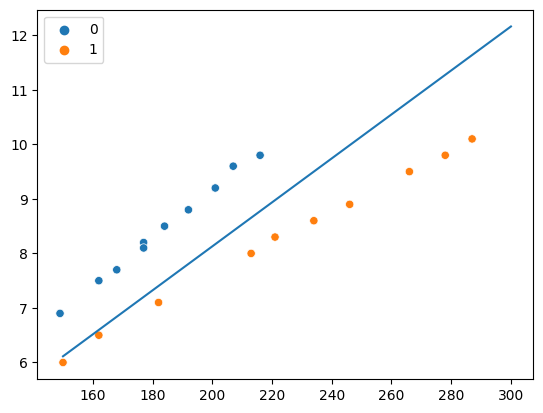

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt

y = lambda x : (-perceptron.weights[1] * x - perceptron.weights[0]) / perceptron.weights[2]

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train[:, 0])
plt.plot([150, 300], [y(150), y(300)])

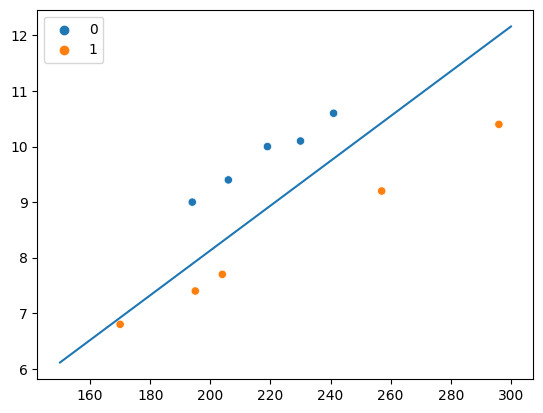

In [361]:
y = lambda x : (-perceptron.weights[1] * x - perceptron.weights[0]) / perceptron.weights[2]

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test[:, 0])
plt.plot([150, 300], [y(150), y(300)])

In [362]:
perceptron.weights

array([ 0.62434536,  0.38824359, -9.62817175])